<a href="https://colab.research.google.com/github/RMartinod/Computer-Graphics-Using-Python/blob/main/Chapter16_Catmull_Rom_curves_in_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Plotting the weight functions (B0, B1, B2, and B3)**

(Text(0.5, 0, 'Parameter, u'), Text(0, 0.5, 'Blending weight, Bi(u)'), None)

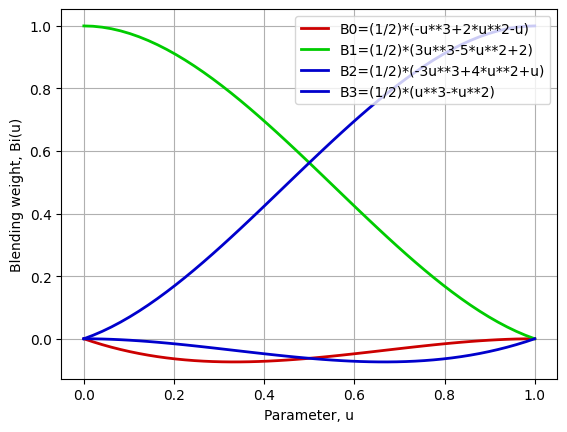

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u  = np.transpose(np.linspace(0,1,50).reshape(1, -1))
Uk = np.concatenate((u**3,u**2,u,np.ones(np.shape(u))),axis=1)
Mk = (1/2)*np.array([[-1, 3,-3, 1], [ 2,-5, 4,-1], [-1, 0, 1, 0], [ 0, 2, 0, 0]])
UM = Uk @ Mk
plt.plot(u,UM[:,0],color=[.8,0,0],linewidth=2,label='B0=(1/2)*(-u**3+2*u**2-u)')
plt.plot(u,UM[:,1],color=[0,.8,0],linewidth=2,label='B1=(1/2)*(3u**3-5*u**2+2)')
plt.plot(u,UM[:,2],color=[0,0,.8],linewidth=2,label='B2=(1/2)*(-3u**3+4*u**2+u)')
plt.plot(u,UM[:,3],color=[0,0,.8],linewidth=2,label='B3=(1/2)*(u**3-*u**2)')
plt.legend(loc='upper right')
plt.xlabel('Parameter, u'), plt.ylabel('Blending weight, Bi(u)'), plt.grid()

**Catmull-Rom curve form 4 random control points in 3D**

In [ ]:
import numpy as np, plotly.express as px
Qk = np.random.rand(4,3)
u  = np.transpose(np.linspace(0,1,50).reshape(1, -1))
Uk = np.concatenate((u**3,u**2,u,np.ones(np.shape(u))),axis=1)
Mk = (1/2)*np.array([[-1, 3,-3, 1],
                     [ 2,-5, 4,-1],
                     [-1, 0, 1, 0],
                     [ 0, 2, 0, 0]])
pu = Uk @ Mk @ Qk
fig = px.line_3d(x=Qk[:,0],y=Qk[:,1],z=Qk[:,2],line_dash=None,markers =True)
fig.add_trace(px.line_3d(x=pu[:,0],y=pu[:,1],z=pu[:,2]).data[0])
fig.update_traces(line_color='darkblue',line_width=4,marker_size=5)

**Closed Catmull-Rom curve form 7 randoms points in 3D**

In [ ]:
import numpy as np, plotly.express as px
Qk = np.random.rand(7,3)
p0 = np.array([Qk[0,0],Qk[0,1],Qk[0,2]]).reshape(1,-1)
p1 = np.array([Qk[1,0],Qk[1,1],Qk[1,2]]).reshape(1,-1)
p2 = np.array([Qk[2,0],Qk[2,1],Qk[2,2]]).reshape(1,-1)
Qk = np.concatenate((Qk,p0,p1,p2))
u  = np.transpose(np.linspace(0,1,50).reshape(1, -1))
Uk = np.concatenate((u**3,u**2,u,np.ones(np.shape(u))),axis=1)
Mk = (1/2)*np.array([[-1, 3,-3, 1], [ 2,-5, 4,-1], [-1, 0, 1, 0], [ 0, 2, 0, 0]])
pu = np.zeros((len(u)*(len(Qk)-len(Mk)+1),3))
for i in range (len(Qk)-len(Mk)+1):
  QkStage = Qk[i:i+len(Mk),:]
  puStage = Uk @ Mk @ QkStage
  pu[len(u)*i:len(u)*(i+1),0:3] = puStage
fig = px.line_3d(x=Qk[:,0],y=Qk[:,1],z=Qk[:,2],line_dash=None,markers =True)
fig.add_trace(px.line_3d(x=pu[:,0],y=pu[:,1],z=pu[:,2]).data[0])
fig.update_traces(line_color='darkblue',line_width=4,marker_size=5)

**Quick project**

Robotic arm trajectory planning is the process of determining a feasible and efficient path for the robotic arm to move from an initial position to a target position while meeting specific constraints. This involves defining the intermediate points and the overall motion profile to achieve smooth, precise, and safe movements.

A key aspect of robotic arm trajectory planning is the path planning. It focuses on defining the spatial route the end-effector (the tool at the robot's tip) will follow, such as a curve in 3D; besides, ensures the path avoids obstacles and adheres to workspace constraints.

In [ ]:
import numpy as np, plotly.express as px
X = [3.000, 1.120, -0.420, -1.769, -1.938, 0.662, 1.046, 1.149, -0.404, -2.364, -1.047, 0.000]
Y = [0.000, 3.425, 2.738, 0.539, -3.748, -4.173, -0.871, 2.306, 4.792, 1.911, -1.754, -3.293]
Z = [0.000, 0.997, 0.142, -0.977, -0.282, 0.937, 0.415, -0.878, -0.541, 0.801, 0.655, -0.707]
Qk = np.concatenate((np.array([X]).reshape(-1,1),np.array([Y]).reshape(-1,1),np.array([Z]).reshape(-1,1)), axis=1)
p0 = np.array([Qk[0,0],Qk[0,1],Qk[0,2]]).reshape(1,-1)
pk = np.array([Qk[len(Qk)-1,0],Qk[len(Qk)-1,1],Qk[len(Qk)-1,2]]).reshape(1,-1)
Qk = np.concatenate((p0,Qk,pk))
u  = np.transpose(np.linspace(0,1,30).reshape(1, -1))
Uk = np.concatenate((u**3,u**2,u,np.ones(np.shape(u))),axis=1)
Mk = (1/2)*np.array([[-1, 3,-3, 1], [ 2,-5, 4,-1], [-1, 0, 1, 0], [ 0, 2, 0, 0]])
pu = np.zeros((len(u)*(len(Qk)-len(Mk)+1),3))
for i in range (len(Qk)-len(Mk)+1):
  QkStage = Qk[i:i+len(Mk),:]
  puStage = Uk @ Mk @ QkStage
  pu[len(u)*i:len(u)*(i+1),0:3] = puStage
fig = px.line_3d(x=Qk[:,0],y=Qk[:,1],z=Qk[:,2],line_dash=None,markers =True)
fig.add_trace(px.line_3d(x=pu[:,0],y=pu[:,1],z=pu[:,2]).data[0])
fig.update_traces(line_color='darkgreen',line_width=4,marker_size=5)